In [1]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow.keras as keras
from tensorflow.keras import backend as K
from IPython.display import display
from mpl_toolkits.mplot3d import axes3d
%matplotlib inline
import face_recognition
import cv2
import time
import math

from tensorflow.keras.applications.xception import Xception
from tensorflow.keras.preprocessing import image
from tensorflow.keras.applications.xception import preprocess_input, decode_predictions
#global variables of the picture size
IMAGESIZE = [299, 299]  # width (0) Height (1) Images are resized to the this before getting push to the network.


# 1 , 0 woman        0, 1 man one hot encoding for gender classification

In [7]:
def get_face_locations(imagePath):
    image = face_recognition.load_image_file(imagePath)
    return face_recognition.face_locations(image, model='cnn')

def get_face_locations_img(image):
    return face_recognition.face_locations(image, model='cnn')

# crop the image to just read the face location
def crop_image(image, face_loc):
    return image[face_loc[1]:face_loc[3], face_loc[0]:face_loc[2]]  #  1 , 3, 0, 2

#(top, right, bottom, left)
def crop_face_recognition_image(image, face_loc):
    return image[face_loc[0]:face_loc[2], face_loc[3]:face_loc[1]]  #  0, 3 ,2 ,1

# resize the image to match the
def resize_image(image):
    dsize = (IMAGESIZE[0], IMAGESIZE[1]) # width (0) Height (1)
    return cv2.resize(image, dsize)

def decode_age_returns(categories, top):
    top_groups = []
    groups = categories.copy()
    for x in range(top):
        group = np.argmax(groups)
        max = group * 5 - 1
        min = group * 5 - 5
        top_groups.append(str(min)+"-"+str(max))
        groups[group] = 0
    return top_groups

def load_trained_model(weights_path):
    model = create_model()
    model.load_weights(weights_path)

In [2]:
gender_model = keras.models.load_model("../Project/0-44298gender-wiki.h5")
age_model = keras.models.load_model("../Project/280000-320000age-imdb.h5")

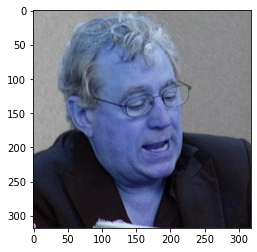

(299, 299, 3)


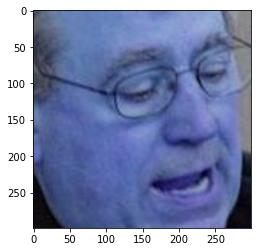

Results for person  0
Male
50-54
sex prediction, female %  4.287295043468475  Male %  95.7127034664154
top predicted Age groups  ['50-54', '35-39', '45-49']
--------------------------------------------------------------------------


In [8]:
#  0, 3 ,2 ,1

imagePath = "../Project/166373528_277123013891977_3234090362513153935_n.jpg"

X=[]
Y=[]
Z=[]
image = cv2.imread(imagePath)    
plt.imshow(image) 
plt.show()
# if the image is one of the corrupted image, skip this entry 
face_loc = get_face_locations_img(image)
#print(face_loc)
#print(np.asarray(face_loc[0]))
for x in range(len(face_loc)): 
    cropped_image = crop_face_recognition_image(image, np.asarray(face_loc[x]))
    resized_image = resize_image(cropped_image)
    X.append(resized_image)
    print(resized_image.shape)
    plt.imshow(resized_image) 
    plt.show()
X = np.array(X)

gender_predicitions  = gender_model.predict(X[:,:,:,:])
age_predicitions  = age_model.predict(X[:,:,:,:])
for x in range(len(X)):
    print("Results for person ", x)
    if (gender_predicitions[x][0] >= 0.5):
        print('Female')
    else:
         print('Male')
    print(decode_age_returns(age_predicitions[x], 1)[0])

    print("sex prediction, female % ", gender_predicitions[x][0]*100, " Male % ", gender_predicitions[x][1]*100)        
    print('top predicted Age groups ', decode_age_returns(age_predicitions[x], 3))
    print("--------------------------------------------------------------------------")
